In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import os
import time

In [3]:
def large_int_to_str(n):
    n = str(n)

    res = ""

    for i in range(len(n)):
        if i != 0 and i % 3 == 0:
            res += "&nbsp;"[::-1]
        res += n[-1 - i]

    return res[::-1]

In [4]:
results = [[24981149, 24981133],
           [7436830,  7436814],
           [7436382,  7435813],
           [6885582,  6885014]]

names = ["base", "vector", "vector + aligning", "vector + aligning + inacc. div."]

print("""
<table>
    <thead>
        <tr>
            <th rowspan=2>Оптимизация</th>
            <th colspan=3 style="text-align: center">Вся программа</th>
            <th colspan=3 style="text-align: center">Функция рендеринга</th>
        </tr>
        <tr>
            <th style="text-align: center">Ir * 10^3</th>
            <th style="text-align: center">% от base</th>
            <th style="text-align: center">% от предыдущего</th>
            <th style="text-align: center">Ir * 10^3</th>
            <th style="text-align: center">% от base</th>
            <th style="text-align: center">% от предыдущего</th>
        </tr>
    </thead>
    <tbody>""")

for i in range(len(results)):
    print(" " * 8 + "<tr>")
    print(" " * 12 + "<td>" + names[i] + "</td>")

    for j in range(2):
        print(" " * 12 + "<td style=\"text-align: center\">" + large_int_to_str(results[i][j]) + "</td>")

        from_base = str(round(results[i][j] / results[0][j] * 100)) + "%"

        if i != 0:
            from_prev = str(round(results[i][j] / results[i - 1][j] * 100)) + "%"
        else:
            from_prev = ""

        print(" " * 12 + "<td style=\"text-align: center\">" + from_base + "</td>")
        print(" " * 12 + "<td style=\"text-align: center\">" + from_prev + "</td>")

print("""    </tbody>
</table>""")



<table>
    <thead>
        <tr>
            <th rowspan=2>Оптимизация</th>
            <th colspan=3 style="text-align: center">Вся программа</th>
            <th colspan=3 style="text-align: center">Функция рендеринга</th>
        </tr>
        <tr>
            <th style="text-align: center">Ir * 10^3</th>
            <th style="text-align: center">% от base</th>
            <th style="text-align: center">% от предыдущего</th>
            <th style="text-align: center">Ir * 10^3</th>
            <th style="text-align: center">% от base</th>
            <th style="text-align: center">% от предыдущего</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>base</td>
            <td style="text-align: center">24&nbsp;981&nbsp;149</td>
            <td style="text-align: center">100%</td>
            <td style="text-align: center"></td>
            <td style="text-align: center">24&nbsp;981&nbsp;133</td>
            <td style="text-align: center">100%</td>
            <t

In [5]:
# Автооглавление README

file = open("README.md")

lines = file.readlines()

contents = "# Содержание\n\n"
counters = [0] * 4
level = 0

for line in lines:
    if not line.startswith("#") or line == "# Содержание\n":
        continue

    cur_level = 0
    while (cur_level + 1) < len(line) and line[cur_level + 1] == "#":
        cur_level += 1

    if cur_level >= len(counters):
        print("Error. More counters needed")

    if cur_level < level:
        for i in range(cur_level + 1, len(counters)):
            counters[i] = 0

    level = cur_level

    header = line[cur_level + 2:-1]

    link = "#" + header.lower().replace(" ", "-").replace("(", "").replace(")", "").replace(".", "").replace("`", "").replace(":","").replace("+", "")

    contents += "    " * cur_level + str(counters[cur_level] + 1) + ". [" + header + "](" + link + ")\n"
    counters[cur_level] += 1

print(contents)

# Содержание

1. [Alpha blending](#alpha-blending)
    1. [Формат `bmp`](#формат-bmp)
    2. [Оптимизации и профилирование](#оптимизации-и-профилирование)
        1. [Варианты программы:](#варианты-программы)
            1. [1. `base` - базовая версия без оптимизаций](#1-base---базовая-версия-без-оптимизаций)
            2. [2. `vector` - векторизация при помощи `AVX2`](#2-vector---векторизация-при-помощи-avx2)
            3. [3. `vector + aligning` - предыдущее + выравнивание памяти](#3-vector--aligning---предыдущее--выравнивание-памяти)
            4. [4. `vector + aligning + inaccurate division by 255` - предыдущее + неточное деление на 255](#4-vector--aligning--inaccurate-division-by-255---предыдущее--неточное-деление-на-255)
        2. [Результаты измерений](#результаты-измерений)
            1. [`KCachegrind` для базового варианта](#kcachegrind-для-базового-варианта)
            2. [`KCachegrind` для `vector + aligning + inaccurate division by 255`](#kcachegrind-для-vector--align

[24981149, 24981133, 7436830, 7436814, 7436382, 7435813, 6885582, 6885014]


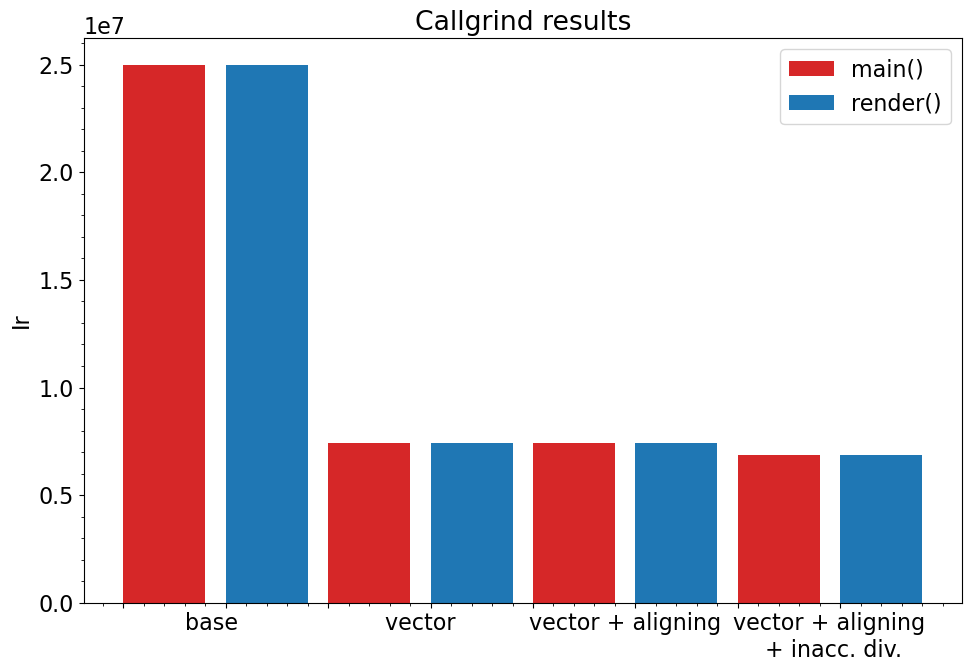

In [35]:
mpl.rcParams['font.size'] = 16
plt.figure(figsize = (10,7), facecolor = "white")

names = ["base    ", "vector   ", "vector + aligning   ", "vector + aligning   \n+ inacc. div.  "]

labels = []
for i in names:
    labels.append(" ")
    labels.append(i)
    labels.append(" ")
y = [y_ for y__ in results for y_ in y__]

print(y)

bar_colors = ['tab:red', 'tab:blue']

bars = []
for i in range(len(y)):
    bars.append(plt.bar(names[i // 2] if i % 2 == 1 else " " * (i + 1), y[i], color = bar_colors[i % 2], align = 'edge'))

    #if i % 2 == 0:
        #bars.append(plt.bar(names[i // 2], 1000000, width = 0.000001, visible = False))

plt.legend(["main()", "render()"], loc='upper right')

plt.ylabel("Ir")
plt.title("Callgrind results")

plt.minorticks_on()
plt.tight_layout()

plt.savefig("img/perf_bar_chart.png")
plt.show()